In [2]:
from google.colab import drive
drive.mount('/content/drive/')

# DUE DATE = [02.06.2023]
# HOPE YOU ENJOYED THE RIDE
# GOOD LUCK!
#    |\---/|
#    | ,_, |
#     \_`_/-..----.
#  ___/ `   ' ,""+ \  
# (__...'   __\    |`.___.';
#   (_,...'(_,.`__)/'.....+

Mounted at /content/drive/


# Regression

Regression is a statistical analysis technique used to model the relationship between a dependent variable (also known as the response or target variable) and one or more independent variables (also known as predictors or features). The goal of regression analysis is to understand and predict the value of the dependent variable based on the values of the independent variables.


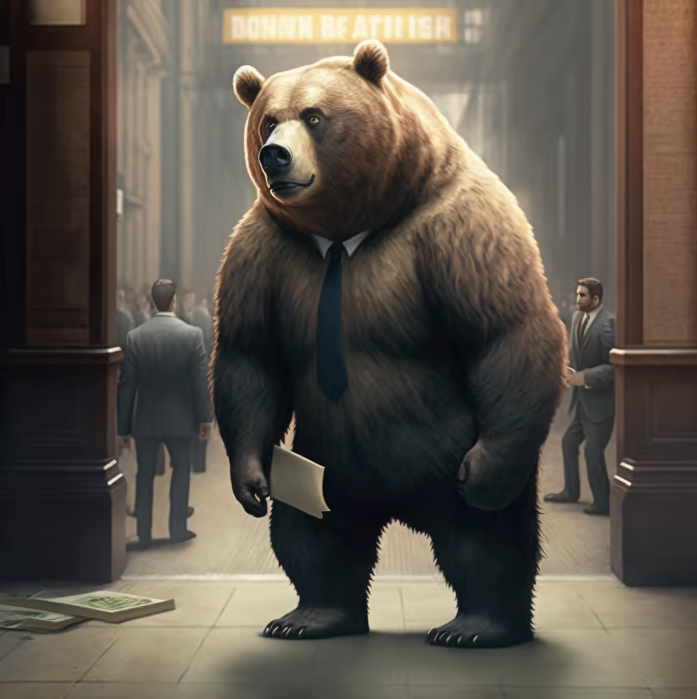
<br>
"Bear Stearns" by Midjourney

In this section, you are going to build a loan interest rate prediction model using regression.

## Data Preprocessing (9 pts)

There were apparently some researchers who were kidnapped during the survey by the Harkonnens which led to incomplete data.
** **
In this section, you are going to load the dataset and drop irrelevant column(s). 

Next, check for missing values and total number of duplicates. You will fill the missing values with the mode of the corresponding feature and print such features.



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

directory_path = '/content/drive/MyDrive/CS 210/Homework 3/'
#loading the data
filename = "loans.csv"
dataframe = pd.read_csv(directory_path + filename)

#dropping the irrelevant column
### WRITE YOUR CODE ###
dataframe.drop(dataframe.columns[:3], axis=1, inplace =True)

#check each feature for missing values and handle them 
### WRITE YOUR CODE ###
missing_values = dataframe.isnull().sum()
featuresWith_missingValues = missing_values[missing_values>0].index.tolist()

for element in featuresWith_missingValues:
    mode = dataframe[element].mode().values[0]
    dataframe[element].fillna(mode, inplace=True)
    print("Features with missing values filled: ", {element}, "," , {mode} )


#checking num_duplicates
### WRITE YOUR CODE ###
total_duplicates = dataframe.duplicated().sum()
print("Total number of duplicates: ", total_duplicates)

Features with missing values filled:  {'Loan_Length'} , {36.0}
Features with missing values filled:  {'Loan_Purpose'} , {'debt_consolidation'}
Features with missing values filled:  {'Employment_Length'} , {10.0}
Total number of duplicates:  0


## Exploratory Data Analysis (18 pts)

Visualize the the interest rates corresponding to different Home_Ownership and Loan_Length parameters.
*   Create a new figure with a size of (10,5).
*   On a bar plot, represent the 'Home_Ownership' column in x-axis and the 'Interest_Rate' column in y-axis.
*   Hue would be according to the Loan_Length.
* Show the plot.



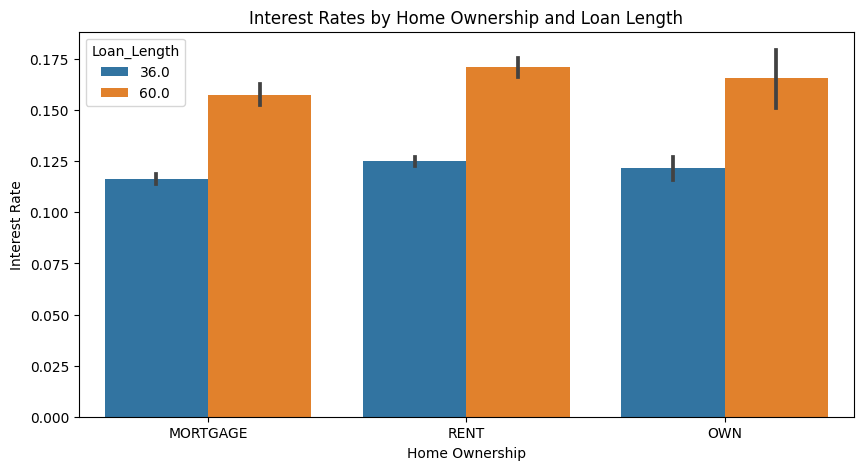

In [4]:
### WRITE YOUR CODE ###
plt.figure(figsize=(10, 5))

sns.barplot(x='Home_Ownership', y='Interest_Rate', hue='Loan_Length', data=dataframe)

plt.title('Interest Rates by Home Ownership and Loan Length')
plt.xlabel('Home Ownership')
plt.ylabel('Interest Rate')

plt.show()

Create a pie plot to demonstrate the share of distribution in home ownership.

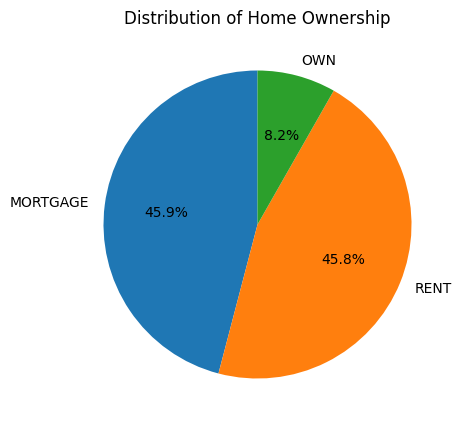

In [5]:
### WRITE YOUR CODE ###
ownership_counts = dataframe['Home_Ownership'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(ownership_counts, labels=ownership_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Home Ownership')

plt.show()

Check the data types for each feature and convert the categorical features into numerical values.

**Hint:** You can use the "get_dummies" function of Pandas library.

In [6]:
### WRITE YOUR CODE ###
data_types = dataframe.dtypes
print("Data types: ", data_types)


Data types:  Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
Home_Ownership                     object
Monthly_Income                    float64
Open_CREDIT_Lines                   int64
Revolving_CREDIT_Balance            int64
Inquiries_in_the_Last_6_Months      int64
Employment_Length                 float64
dtype: object


In [9]:
### WRITE YOUR CODE ###


pd.get_dummies(dataframe.dtypes)

,int64,float64,object
Amount_Funded_By_Investors,0,1,0
Interest_Rate,0,1,0
Loan_Length,0,1,0
Loan_Purpose,0,0,1
Debt_To_Income_Ratio,0,1,0
Home_Ownership,0,0,1
Monthly_Income,0,1,0
Open_CREDIT_Lines,1,0,0
Revolving_CREDIT_Balance,1,0,0
Inquiries_in_the_Last_6_Months,1,0,0


Create a heatmap to present the relationships between different features.

<ipython-input-13-6a33011f137b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataframe.corr()


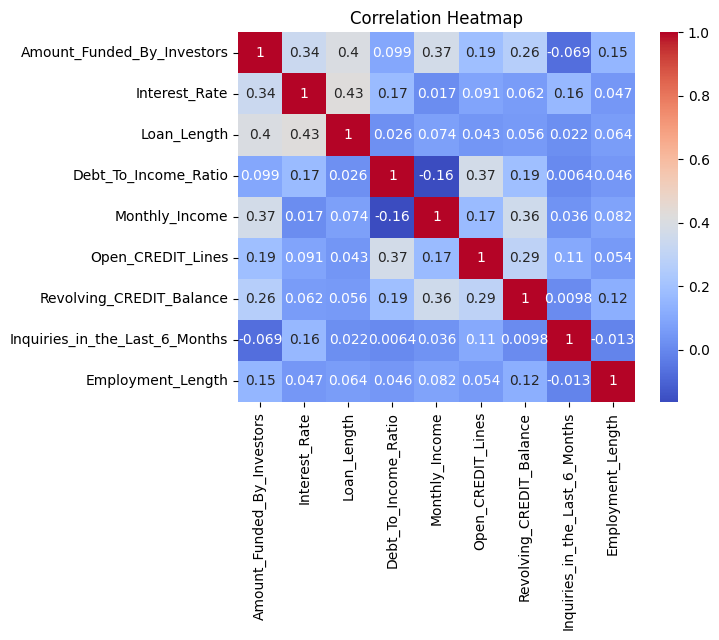

In [13]:
### WRITE YOUR CODE ###

corr_matrix = dataframe.corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')

plt.show()

## Model Evaluation (15 pts)

Separate the data into features and labels.



In [14]:
#seperate the data into features and labels
### WRITE YOUR CODE ###
features = dataframe.drop('Interest_Rate', axis=1)
labels = dataframe['Interest_Rate']
X= dataframe.iloc[:, :-1]
y= dataframe.iloc[:, -1]




Split the data into training and test data. You could use a ratio of 80/20.

In [15]:
### WRITE YOUR CODE ###
from sklearn.model_selection import train_test_split

encoded_features = pd.get_dummies(features)

X_train, X_test, y_train, y_test = train_test_split(encoded_features, labels, test_size=0.2, random_state=42)



Train a linear regression model on and report the MSE and R2 score on the training data.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()


model.fit(X_train, y_train)


train_predictions = model.predict(X_train)


mse = mean_squared_error(y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)

print("Training MSE:", mse)
print("Training R2 Score:", r2)



Training MSE: 0.0011822078452108993
Training R2 Score: 0.30076909996553447


Run the model on test data and report the MSE and R2 score.

In [17]:
# Predict the target variable on the test data
### WRITE YOUR CODE ###
test_predictions = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R2 score on the test data
### WRITE YOUR CODE ###
mse_test = mean_squared_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)
# Print the MSE and R2 score on the test data
### WRITE YOUR CODE ###
print("Test MSE:", mse_test)
print("Test R2 Score:", r2_test)

Test MSE: 0.0012641552797981643
Test R2 Score: 0.2802741455454417


# Experiment with Different Regression Models (8 pts)

Experiment with at least one alternative regression model.

Report the results in comparison with those of the linear regressor.

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
poly_model.fit(X_train, y_train)
poly_predictions = poly_model.predict(X_test)
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_r2 = r2_score(y_test, poly_predictions)

# Print the results
print("Linear Regression - MSE:", linear_mse)
print("Linear Regression - R2 Score:", linear_r2)
print("Polynomial Regression - MSE:", poly_mse)
print("Polynomial Regression - R2 Score:", poly_r2)


Linear Regression - MSE: 0.0012641552797981643
Linear Regression - R2 Score: 0.2802741455454417
Polynomial Regression - MSE: 0.0014305233043971923
Polynomial Regression - R2 Score: 0.18555526838537473


# Classification

Classification is a fundamental task in machine learning that is often used in conjunction with regression. The goal of a classification task is to train a machine learning algorithm to accurately assign a given set of features to the correct class. There are various types of classification tasks, such as image classification, text classification, and audio classification etc.

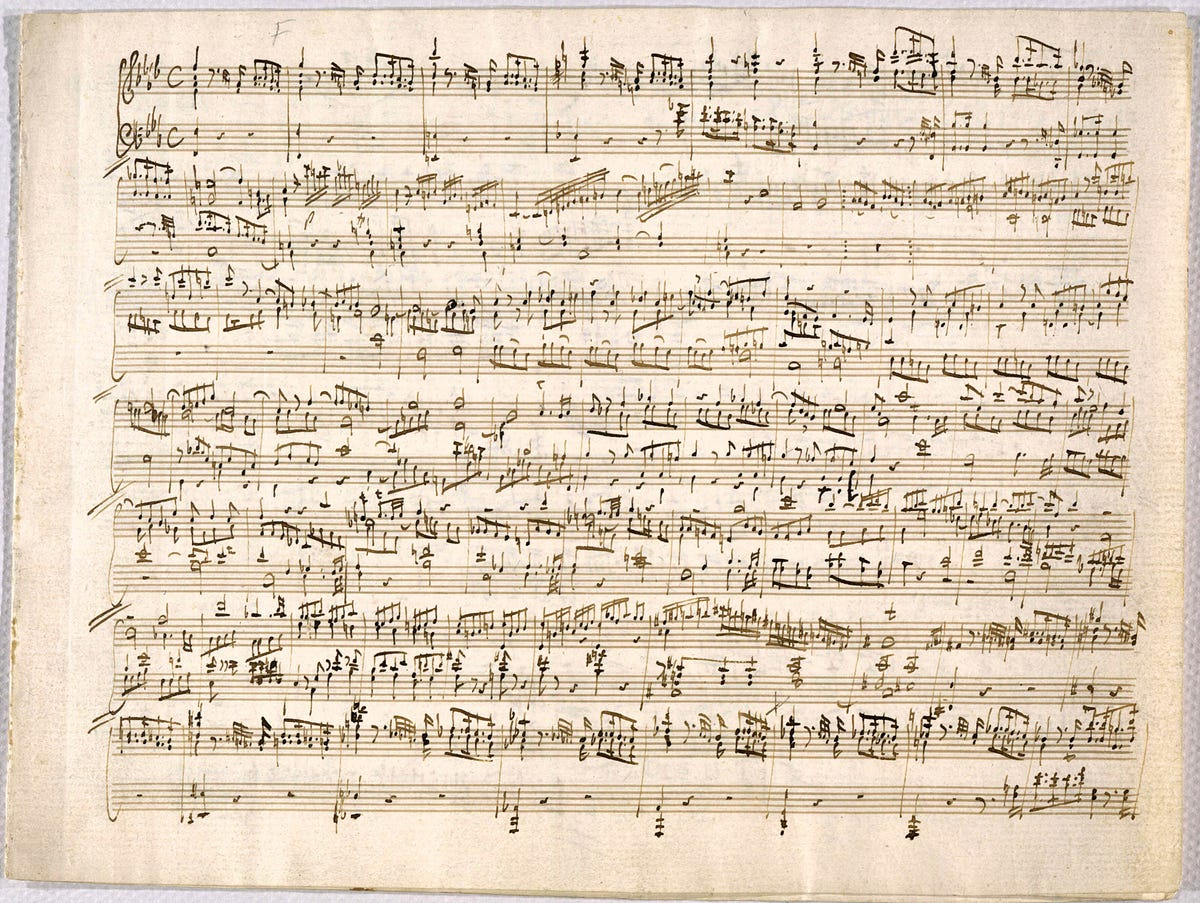

In this section, we are going to build and train a model which can figure out the composer from the notes and velocities that are in the song. These values are stored inside midi files. 

In [19]:
!pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 51.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 7.1 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=41cdac5c8cf821d2d11413b85b1639e3f605cd734993f07e68a0e67640c5aa8d
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [20]:
import pretty_midi
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

Do not delete this function. We will use this function to extract the values we have talked before.

In [21]:
def extractNotesAndVelocities(path):
    # Reading the midi file
    midi_data = pretty_midi.PrettyMIDI(path)
    
    notes = np.array([])
    velocities = np.array([])

    # Extracting pitch and velocity values of each song 
    for instrument in midi_data.instruments:
      notes = np.append(notes, np.array([note.pitch for note in instrument.notes]))
      velocities = np.append(velocities, np.array([note.velocity for note in instrument.notes]))

    return notes, velocities

## Data Loading (10 pts)

Read the MIDI files in all the folders in the given root directory and store them in a dictionary. There are some corrupted files inside the folders so don't forget to write a code to bypass that. You can use the extractNotesAndVelocities function above to extract the needed values. (10 pts)

In [22]:
def createComposersDictionary(root_path):
    composers = {}

    # Iterate through the folders in the root directory
    for folder_name in os.listdir(root_path):
        folder_path = os.path.join(root_path, folder_name)
        if os.path.isdir(folder_path):
            composer = folder_name
            composers[composer] = []

            # Iterate through the MIDI files in the composer's folder
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                try:
                    # Attempt to extract notes and velocities
                    notes, velocities = extractNotesAndVelocities(file_path)
                    composers[composer].append((notes, velocities))
                except Exception as e:
                    print(f"Error processing file: {file_name}, Error: {str(e)}")
    
    return composers

root_path = "/content/drive/MyDrive/CS 210/Homework 3/musicnet_midis"
composers = createComposersDictionary(root_path)

/usr/local/lib/python3.10/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Error processing file: 2211_fugue12.mid, Error: no MTrk header at start of track
Error processing file: 2310_prelude15.mid, Error: data byte must be in range 0..127
Error processing file: 2292_prelude19.mid, Error: 
Error processing file: 2227_fugue6.mid, Error: data byte must be in range 0..127
Error processing file: 2194_prelude13.mid, Error: data byte must be in range 0..127
Error processing file: 2230_prelude20.mid, Error: data byte must be in range 0..127
Error processing file: 2305_prelude14.mid, Error: no MTrk header at start of track


## Mapping Name to Index (5 pts)

Since the machine learning solutions only understand numeric values we need to create a mapping from names of the composers to numbers.(5 pts)

In [23]:
from sklearn.preprocessing import LabelEncoder

composer_names = list(composers.keys())

# Create an instance of LabelEncoder
composer_encoder = LabelEncoder()

# Fit the encoder to the composer names and transform them into numerical values
composer_labels = composer_encoder.fit_transform(composer_names)

# Create a dictionary to map composer names to their corresponding numerical values
composer_name_to_index = dict(zip(composer_names, composer_labels))

In [24]:
composer_name_to_index

{'Mozart': 2, 'Schubert': 3, 'Beethoven': 1, 'Bach': 0}

## Data Preprocessing (10 pts)

The machine learning algorithms work by using fixed sized inputs and outputs and songs have different numbers of notes, therefore we need to put them inside a fixed sized of vectors. Fixed size will be 400!!!

Scikit-learn only has shallow machine learning algorithms, thus you can use flatten() function to convert the numpy array of notes and velocities to 1d vector.



In [25]:
fixed_size = 400

# Initialize empty lists to store the processed data
labels = []
features = []
notes = []
velocities = []

for composer, notes_and_velocities in composers.items():
    for i in range(len(notes_and_velocities)):
        # Bypass the songs with less than 400 notes
        if len(notes_and_velocities[i][0]) < fixed_size:
            continue
        
        # Extract and store the average notes and velocities of each fixed-sized vector
        avg_notes = np.mean(notes_and_velocities[i][0][:fixed_size])
        avg_velocities = np.mean(notes_and_velocities[i][1][:fixed_size])
        
        # Extract and store the composer names of each fixed-sized vector
        composer_name = composer
        
        # Extract and store the features (notes and velocities) of each fixed-sized vector
        # Flatten the arrays to convert them into 1-dimensional vectors
        feature_vector = np.concatenate([notes_and_velocities[i][0][:fixed_size].flatten(),
                                         notes_and_velocities[i][1][:fixed_size].flatten()])
        
        # Append the data to the corresponding lists
        labels.append(composer_name)
        features.append(feature_vector)
        notes.append(avg_notes)
        velocities.append(avg_velocities)

# Convert the lists to numpy arrays
labels = np.array(labels)
features = np.array(features)
notes = np.array(notes)
velocities = np.array(velocities)


# Data Visualization (6 pts)

Visualize the average velocity and pitch of each song(400 fixed size vector) with the composers as colors.


1.   Create figure with 16, 12 figsize
2.   Plot scatter plot using notes and velocities with labels as color
3.   Write xlabel as Notes
4.   Write ylabel as Velocities
5.   Write title as Notes vs Velocities with Labels
6.   Put colorbar
7.   Show the plot

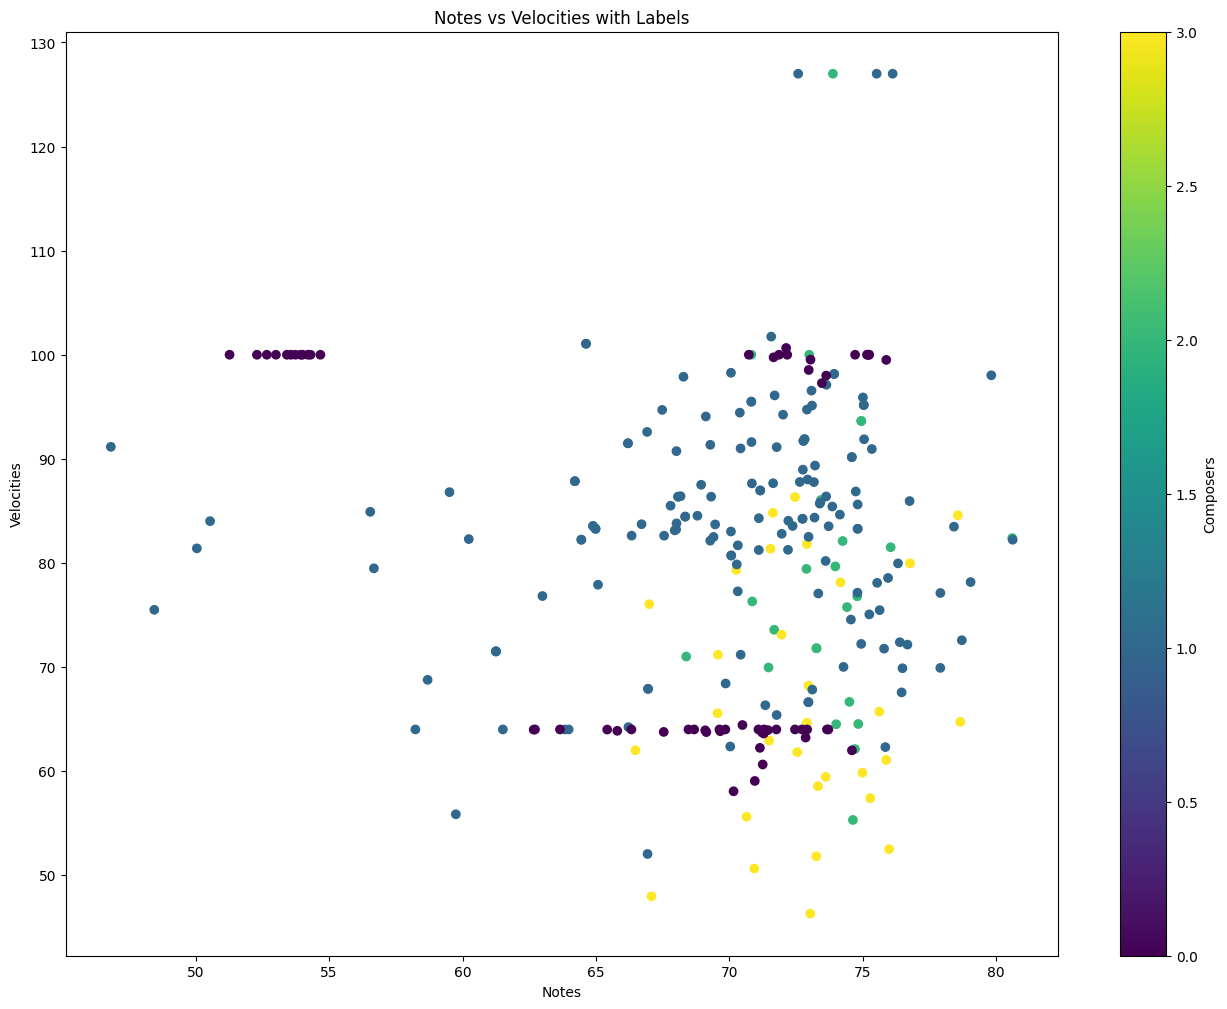

In [26]:
### WRITE YOUR CODE ###

from sklearn.preprocessing import LabelEncoder

# Convert labels to numeric values
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

# Create a scatter plot
plt.figure(figsize=(16, 12))
plt.scatter(notes, velocities, c=numeric_labels, cmap='viridis')

# Set labels and title
plt.xlabel('Notes')
plt.ylabel('Velocities')
plt.title('Notes vs Velocities with Labels')

# Add colorbar
colorbar = plt.colorbar()
colorbar.set_label('Composers')

# Show the plot
plt.show()



## Checking lengths (2 pts)

Check whether the lengths of features and labels are the same or not.(2pts)

In [27]:
### WRITE YOUR CODE ###
if features.shape[0] == labels.shape[0]:
    print("The length of features and labels are the same.")
else:
    print("The length of features and labels are different.")


The length of features and labels are the same.


## Train-test split (2 pts)

Split the features and labels into train and test datasets using sklearn with test size of 0.2(2 pts)

In [29]:
### WRITE YOUR CODE ###
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)



## Choosing and training a model (10 pts)

Choose a classification model and explain why it is the better choice.(8 pts)

Train the model(2pts)

In [30]:
### WRITE YOUR CODE ###
# I chose this because RandomForestClassifier gave me the highest f1 score.
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the model on the training data
rf_classifier.fit(train_features, train_labels)


RandomForestClassifier()

## Model Evaluation (5 pts)

Predict on test features and use f1_score to evaluate your model.(5pts)

In [31]:
### WRITE YOUR CODE ###
from sklearn.metrics import f1_score

# Predict on the test features
test_predictions = rf_classifier.predict(test_features)

# Calculate the F1 score
f1 = f1_score(test_labels, test_predictions, average='weighted')

# Print the F1 score
print("F1 Score: ", f1)



F1 Score:  0.7896486229819564
